## Homework 1

From web (https://www.gutenberg.org/browse/scores/top) download the book The Adventures of Huckleberry Finn, by Mark Twain (en formato TXT)

1. Downloading the book in plain text forma utf-8 from Project Gutenberg web page.

In [120]:
#Import library for opening URLs
from urllib.request import urlopen
contents = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')
print(type(contents))


<class 'str'>


 a) Analyze the book by counting the appearance of three main character names: Jim, Tom, Huck through the chapters of the book.
 
 First, we create some useful functions to get the asked information.

In [154]:
# Function to convert integer to Roman values
def to_Roman(number):
    num = [1, 4, 5, 9, 10, 40, 50, 90,
        100, 400, 500, 900, 1000]
    sym = ["I", "IV", "V", "IX", "X", "XL",
        "L", "XC", "C", "CD", "D", "CM", "M"]
    
    i = len(sym)-1
    
    rnum = ""

    while number:
        div = number // num[i] #Floor division
        number %= num[i]

        while div:            
            rnum+=sym[i]
            div -= 1
        i -= 1
    return rnum

In [155]:
def get_chapter(i):
    
    end = "\r\n\r\n\r\n\r\n\r\n"
    ap = "\r\n\r\n\r\n"
    
    c = 'CHAPTER '+to_Roman(i)+'.'+ap
    start = contents.find(c)
    stop = contents.find(end, start)
    
    chapter = contents[start:stop]
    
    return chapter

In [160]:
#For counting appearances in a selected chapter
def appearance(name, chapter_num):
    text = get_chapter(chapter_num)
    app = text.count(name)
    
    return app


In [182]:
Until = 52
capitulos = [k for k in range (1,Until+1)]
personajes = ['Tom', 'Jim', 'Huck']

In [183]:
total_counts = []
for n in capitulos:
    counts = []
    for nombre in personajes:        
        apr = appearance(nombre,n)
        counts.append(apr)
    total_counts.append(counts) 
               

In [184]:
print(total_counts)

[[6, 0, 3], [24, 16, 2], [5, 0, 2], [0, 8, 1], [0, 0, 0], [0, 0, 2], [2, 0, 0], [2, 22, 5], [0, 11, 1], [0, 19, 0], [2, 4, 4], [3, 20, 0], [1, 9, 0], [0, 6, 5], [0, 16, 7], [0, 28, 10], [3, 0, 0], [5, 10, 1], [0, 13, 0], [0, 18, 1], [0, 1, 0], [0, 0, 0], [0, 9, 7], [0, 5, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 0], [0, 3, 0], [0, 5, 0], [1, 17, 2], [4, 0, 0], [19, 5, 0], [15, 17, 4], [14, 18, 8], [18, 23, 1], [9, 4, 0], [32, 27, 2], [11, 10, 0], [11, 13, 3], [8, 0, 0], [30, 12, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [198]:
import numpy as np
arr_counts = np.array(total_counts)

b) Saving results in a Pandas DataFrame to visualize as below:

In [199]:
import pandas as pd

columnas = ['Chapter_'+ str(i) for i in capitulos]

df = pd.DataFrame(arr_counts.T, index=personajes, columns=columnas)
df

,Chapter_1,Chapter_2,Chapter_3,Chapter_4,Chapter_5,Chapter_6,Chapter_7,Chapter_8,Chapter_9,Chapter_10,Chapter_11,Chapter_12,Chapter_13,Chapter_14,Chapter_15,Chapter_16,Chapter_17,Chapter_18,Chapter_19,Chapter_20,Chapter_21,Chapter_22,Chapter_23,Chapter_24,Chapter_25,Chapter_26,Chapter_27,Chapter_28,Chapter_29,Chapter_30,Chapter_31,Chapter_32,Chapter_33,Chapter_34,Chapter_35,Chapter_36,Chapter_37,Chapter_38,Chapter_39,Chapter_40,Chapter_41,Chapter_42,Chapter_43,Chapter_44,Chapter_45,Chapter_46,Chapter_47,Chapter_48,Chapter_49,Chapter_50,Chapter_51,Chapter_52
Tom,6,24,5,0,0,0,2,2,0,0,2,3,1,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,4,19,15,14,18,9,32,11,11,8,30,0,0,0,0,0,0,0,0,0,0
Jim,0,16,0,8,0,0,0,22,11,19,4,20,9,6,16,28,0,10,13,18,1,0,9,5,0,0,0,1,3,5,17,0,5,17,18,23,4,27,10,13,0,12,0,0,0,0,0,0,0,0,0,0
Huck,3,2,2,1,0,2,0,5,1,0,4,0,0,5,7,10,0,1,0,1,0,0,7,1,0,0,0,0,0,0,2,0,0,4,8,1,0,2,0,3,0,2,0,0,0,0,0,0,0,0,0,0


c) Export the table to a CSV file

In [200]:
df.to_csv('Counts.csv')

In [201]:
!ls

Counts.csv  homework_01-solved.ipynb  void


d) Import the saved CSV file using Pandas and plot the cumulative occurrence (cumsum) of the characters.

In [215]:
df_1 = pd.DataFrame(data=pd.read_csv('Counts.csv',index_col=0))
#df_1 = df_1.rename(columns={df_1.columns[0]:'Names'})

df_1

,Chapter_1,Chapter_2,Chapter_3,Chapter_4,Chapter_5,Chapter_6,Chapter_7,Chapter_8,Chapter_9,Chapter_10,Chapter_11,Chapter_12,Chapter_13,Chapter_14,Chapter_15,Chapter_16,Chapter_17,Chapter_18,Chapter_19,Chapter_20,Chapter_21,Chapter_22,Chapter_23,Chapter_24,Chapter_25,Chapter_26,Chapter_27,Chapter_28,Chapter_29,Chapter_30,Chapter_31,Chapter_32,Chapter_33,Chapter_34,Chapter_35,Chapter_36,Chapter_37,Chapter_38,Chapter_39,Chapter_40,Chapter_41,Chapter_42,Chapter_43,Chapter_44,Chapter_45,Chapter_46,Chapter_47,Chapter_48,Chapter_49,Chapter_50,Chapter_51,Chapter_52
Tom,6,24,5,0,0,0,2,2,0,0,2,3,1,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,4,19,15,14,18,9,32,11,11,8,30,0,0,0,0,0,0,0,0,0,0
Jim,0,16,0,8,0,0,0,22,11,19,4,20,9,6,16,28,0,10,13,18,1,0,9,5,0,0,0,1,3,5,17,0,5,17,18,23,4,27,10,13,0,12,0,0,0,0,0,0,0,0,0,0
Huck,3,2,2,1,0,2,0,5,1,0,4,0,0,5,7,10,0,1,0,1,0,0,7,1,0,0,0,0,0,0,2,0,0,4,8,1,0,2,0,3,0,2,0,0,0,0,0,0,0,0,0,0


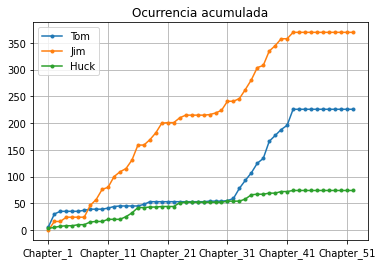

In [242]:
df_2 = df_1.T.cumsum()

g = df_2.plot(style='.-', grid=True, title='Cumulative ocurrence')
